<a href="https://colab.research.google.com/github/nirmalya8/PyTorchBasics/blob/main/Linear_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION USING PYTORCH**


In this notebook we will implement Linear Regression using PyTorch. We will look at two approaches: First, from scratch and second using PyTorch built-ins. We will use a custom dataset :


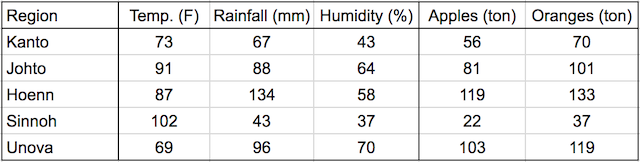 

---

In the given dataset we have Temperature, Rainfall and Humidity as the predictors. The yield of Apples and Oranges are the two targets.We will consider that there is a linear relationship between the predictors and the targets :

Yield of Apples = $$w_{11}*Temp.(F) + w_{12}*Rainfall(mm) +w_{13}*Humidity(percentage) +b1$$

Yield of Oranges = $$w_{21}*Temp.(F) + w_{22}*Rainfall(mm) +w_{23}*Humidity(percentage) +b2$$

In [ ]:
import torch

# Linear Regression from Scratch

First we will take in the data as numpy arrays containing 5 rows and 3 columns. 

In [ ]:
import numpy as np
predictors = np.array([[73,67,43],[91,88,64],[87,134,58],[102,43,37],[69,96,70]],dtype='float32')
outputs = np.array([[56,70],[81,101],[119,133],[22,37],[103,119]],dtype='float32')
predictors,outputs

(array([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]], dtype=float32), array([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]], dtype=float32))

Now, we have to convert these numpy arrays to torch tensors for the data to be processed using PyTorch

In [ ]:
inputs = torch.from_numpy(predictors)
targets = torch.from_numpy(outputs)
inputs,targets

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

Now that we have the data ready, let us look at how we will perform linear regression:


Step 1: Randomly Assign weights and biases

Step 2: Define a loss function

Step 3: Using the linear relationship, weights and biases and the loss function calculate how far we are from the actual truth.

Step 4: Optimize the loss function so that for a certain set of values of weights and biases, we have the least loss.

Step 5: Finally, use the best set of values of weights and biases to make predictions.

In [ ]:
#Step 1: Randomly assigning weights and biases
weights = torch.randn(2,3,requires_grad=True)
biases = torch.randn(2,requires_grad=True)
weights,biases

(tensor([[ 1.6060, -0.7770, -2.3918],
         [ 1.0371,  0.3349,  2.0804]], requires_grad=True),
 tensor([-0.4646,  0.3235], requires_grad=True))

In [ ]:
def loss_mse(x, y):
  return torch.norm(x-y)/x.numel()

In [ ]:
def model(w, b, x):
  return x @ w.t() + b

Lets make some predictions using the randomly assigned weights and biases

In [ ]:
with torch.no_grad():
  pred = model(weights,biases,inputs)
  l = loss_mse(targets,pred)
  print("Loss = {}".format(l))

Loss = 48.45110321044922


In [ ]:
pred, targets

(tensor([[ -38.1336,  187.9267],
         [ -75.7708,  257.3152],
         [-103.5879,  256.0877],
         [  41.4411,  197.4852],
         [-131.6707,  249.6590]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

We can see that the error is huge and our predictions are way off. So now we have to train it.

In [ ]:
lr = 1e-3
e = 100
for epoch in range(e):
    preds = model(weights,biases,inputs)
    loss = loss_mse(targets,preds)
    if epoch%5 == 0:
      print("Loss at Epoch [{}/{}] is {}".format(epoch,e,loss))
    loss.backward()#create_graph=True,allow_unreachable=False)
    with torch.no_grad():
      weights -= lr*weights.grad
      biases -=  lr*biases.grad
    weights.grad.zero_()
    biases.grad.zero_()

Loss at Epoch [0/100] is 0.4477366805076599
Loss at Epoch [5/100] is 0.4477364122867584
Loss at Epoch [10/100] is 0.4477360248565674
Loss at Epoch [15/100] is 0.4477362632751465
Loss at Epoch [20/100] is 0.4477354884147644
Loss at Epoch [25/100] is 0.4477352201938629
Loss at Epoch [30/100] is 0.4477368891239166
Loss at Epoch [35/100] is 0.4477360248565674
Loss at Epoch [40/100] is 0.447737455368042
Loss at Epoch [45/100] is 0.4477367401123047
Loss at Epoch [50/100] is 0.44773808121681213
Loss at Epoch [55/100] is 0.4477359652519226
Loss at Epoch [60/100] is 0.4477368891239166
Loss at Epoch [65/100] is 0.4477373957633972
Loss at Epoch [70/100] is 0.44773587584495544
Loss at Epoch [75/100] is 0.4477371275424957
Loss at Epoch [80/100] is 0.44773611426353455
Loss at Epoch [85/100] is 0.4477364420890808
Loss at Epoch [90/100] is 0.44773703813552856
Loss at Epoch [95/100] is 0.44773682951927185


In [ ]:
def train(x,y,w,b,lr,e):
  
  for epoch in range(e):
    preds = model(w,b,x)
    loss = loss_mse(y,preds)
    if epoch%5 == 0:
      print("Loss at Epoch [{}/{}] is {}".format(epoch,e,loss))
    #loss.requires_grad=True
    loss.backward()
    with torch.no_grad():
      w_new = w - lr*w.grad
      b_new = b - lr*b.grad
      w.copy_(w_new)
      b.copy_(b_new)
      w.grad.zero_()
      b.grad.zero_()

In [ ]:
train(inputs,targets,weights,biases,1e-3,1100)

Loss at Epoch [0/1100] is 2.730823278427124
Loss at Epoch [5/1100] is 2.707557439804077
Loss at Epoch [10/1100] is 2.6843037605285645
Loss at Epoch [15/1100] is 2.6610605716705322
Loss at Epoch [20/1100] is 2.6378283500671387
Loss at Epoch [25/1100] is 2.6146061420440674
Loss at Epoch [30/1100] is 2.591391086578369
Loss at Epoch [35/1100] is 2.5681843757629395
Loss at Epoch [40/1100] is 2.544987440109253
Loss at Epoch [45/1100] is 2.521798610687256
Loss at Epoch [50/1100] is 2.4986178874969482
Loss at Epoch [55/1100] is 2.4754419326782227
Loss at Epoch [60/1100] is 2.4522759914398193
Loss at Epoch [65/1100] is 2.4291152954101562
Loss at Epoch [70/1100] is 2.405961513519287
Loss at Epoch [75/1100] is 2.3828136920928955
Loss at Epoch [80/1100] is 2.359672784805298
Loss at Epoch [85/1100] is 2.3365375995635986
Loss at Epoch [90/1100] is 2.3134069442749023
Loss at Epoch [95/1100] is 2.2902846336364746
Loss at Epoch [100/1100] is 2.267167806625366
Loss at Epoch [105/1100] is 2.2440562248229

# Linear Regression using PyTorch Builtins

In [ ]:
import torch.nn as nn

In [ ]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
inputs,targets

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 74.,  66.,  43.],
         [ 91.,  87.,  65.],
         [ 88., 134.,  59.],
         [101.,  44.,  37.],
         [ 68.,  96.,  71.],
         [ 73.,  66.,  44.],
         [ 92.,  87.,  64.],
         [ 87., 135.,  57.],
         [103.,  43.,  36.],
         [ 68.,  97.,  70.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 57.,  69.],
         [ 80., 102.],
         [118., 132.],
         [ 21.,  38.],
         [104., 118.],
         [ 57.,  69.],
         [ 82., 100.],
         [118., 134.],
         [ 20.,  38.],
         [102., 120.]]))

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
data = TensorDataset(inputs,targets)

In [ ]:
data[1],data[2]

((tensor([91., 88., 64.]), tensor([ 81., 101.])),
 (tensor([ 87., 134.,  58.]), tensor([119., 133.])))

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
data = DataLoader(data,batch_size=5,shuffle=True)

In [ ]:
for x,y in data:
  print(x)
  print(y)

tensor([[ 87., 135.,  57.],
        [ 73.,  67.,  43.],
        [ 68.,  96.,  71.],
        [ 92.,  87.,  64.],
        [ 73.,  66.,  44.]])
tensor([[118., 134.],
        [ 56.,  70.],
        [104., 118.],
        [ 82., 100.],
        [ 57.,  69.]])
tensor([[103.,  43.,  36.],
        [101.,  44.,  37.],
        [ 68.,  97.,  70.],
        [ 91.,  87.,  65.],
        [ 87., 134.,  58.]])
tensor([[ 20.,  38.],
        [ 21.,  38.],
        [102., 120.],
        [ 80., 102.],
        [119., 133.]])
tensor([[102.,  43.,  37.],
        [ 88., 134.,  59.],
        [ 91.,  88.,  64.],
        [ 74.,  66.,  43.],
        [ 69.,  96.,  70.]])
tensor([[ 22.,  37.],
        [118., 132.],
        [ 81., 101.],
        [ 57.,  69.],
        [103., 119.]])


In [ ]:
model = nn.Linear(3, 2)
list(model.parameters())

[Parameter containing:
 tensor([[-0.1429, -0.5374,  0.0074],
         [ 0.0774, -0.3445,  0.3844]], requires_grad=True),
 Parameter containing:
 tensor([-0.0992, -0.2031], requires_grad=True)]

In [ ]:
pred = model(inputs)
pred

tensor([[-46.2184,  -1.1026],
        [-59.9209,   1.1288],
        [-84.1135, -17.3332],
        [-37.5091,   7.1045],
        [-61.0322,  -1.0245],
        [-45.8239,  -0.6807],
        [-59.3761,   1.8577],
        [-84.2490, -16.8714],
        [-37.9036,   6.6826],
        [-60.8819,  -0.7176],
        [-45.6737,  -0.3738],
        [-59.5264,   1.5507],
        [-84.6583, -18.0621],
        [-37.6594,   6.7976],
        [-61.4267,  -1.4464]], grad_fn=<AddmmBackward>)

In [ ]:
import torch.nn.functional as f

In [ ]:
loss = f.mse_loss

In [ ]:
optimizer  = torch.optim.SGD(model.parameters(),lr = 1e-5)

In [ ]:
def trainbuiltin(d,m,e):
  for epoch in range(e):
    for x,y in d:
      preds = m(x)
      l = loss(preds,y)
      l.backward()
      optimizer.step()
      optimizer.zero_grad()
    if epoch%5 == 0:
      print("Loss at Epoch [{}/{}] is {}".format(epoch,e,l.item()))
  return m

In [ ]:
m = trainbuiltin(data,model,1000)

Loss at Epoch [0/1000] is 1.1597155332565308
Loss at Epoch [5/1000] is 0.9614383578300476
Loss at Epoch [10/1000] is 0.7697917819023132
Loss at Epoch [15/1000] is 1.3925151824951172
Loss at Epoch [20/1000] is 1.2119371891021729
Loss at Epoch [25/1000] is 1.0899722576141357
Loss at Epoch [30/1000] is 1.4991734027862549
Loss at Epoch [35/1000] is 0.8812239766120911
Loss at Epoch [40/1000] is 0.7748129963874817
Loss at Epoch [45/1000] is 1.5951777696609497
Loss at Epoch [50/1000] is 1.461078405380249
Loss at Epoch [55/1000] is 0.8589251637458801
Loss at Epoch [60/1000] is 1.441028356552124
Loss at Epoch [65/1000] is 1.2147014141082764
Loss at Epoch [70/1000] is 1.2354624271392822
Loss at Epoch [75/1000] is 1.3846714496612549
Loss at Epoch [80/1000] is 1.0210992097854614
Loss at Epoch [85/1000] is 1.2560070753097534
Loss at Epoch [90/1000] is 1.111302375793457
Loss at Epoch [95/1000] is 1.0853291749954224
Loss at Epoch [100/1000] is 0.7970272898674011
Loss at Epoch [105/1000] is 0.94108235

In [ ]:
m(inputs)

tensor([[ 56.9468,  70.3616],
        [ 82.0712, 100.5668],
        [118.1907, 132.7914],
        [ 20.8284,  37.7579],
        [101.8974, 118.5072],
        [ 55.7013,  69.2851],
        [ 81.9308, 100.6653],
        [118.4878, 133.3971],
        [ 22.0739,  38.8344],
        [103.0024, 119.6823],
        [ 56.8064,  70.4601],
        [ 80.8257,  99.4902],
        [118.3311, 132.6929],
        [ 19.7233,  36.5828],
        [103.1428, 119.5838]], grad_fn=<AddmmBackward>)

In [ ]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])